In [1]:
import pandas as pd
import seaborn as sns


In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

* RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
* CustomerId — идентификатор клиента
* Surname — фамилия клиента
* CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
* Geography — страна клиента (банк международный)
* Gender — пол клиента
* Age — возраст клиента
* Tenure — сколько лет клиент пользуется услугами банка
* Balance — баланс на счетах клиента в банке
* NumOfProducts — количество услуг банка, которые приобрёл клиент
* HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
* IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
* EstimatedSalary — предполагаемая заработная плата клиента
* Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)


In [3]:
churn_data.drop('RowNumber', axis=1, inplace=True)

Задание: нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

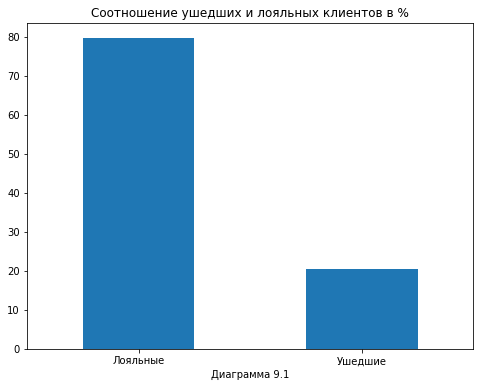

In [5]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
churn_data['Exited_label'] = churn_data['Exited'].apply(lambda x: 'Лояльные' if x==0 else 'Ушедшие')
df91 = churn_data.groupby('Exited_label')['CustomerId'].count()
churn_data.drop('Exited_label', axis=1, inplace=True)
df91 = 100 * df91 / churn_data['CustomerId'].count()
df91.plot(
    kind='bar'
    ,title='Cоотношение ушедших и лояльных клиентов в %'
    ,figsize=(8, 6)
    ,rot=0
    ,xlabel = 'Диаграмма 9.1'
    );

На диаграмме 9.1 видно, что лояльных клиентов в 4 раза больше чем ушедших.

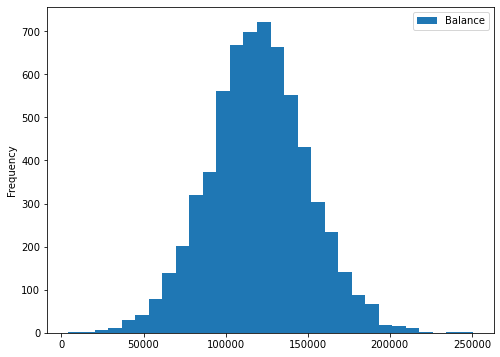

In [6]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых
# на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
df92 = churn_data[churn_data['Balance']>2500]
df92.plot(
    kind='hist'
    ,y='Balance'
    ,figsize=(8, 6)
    ,bins=30
);

Видно, что распределение балланса клиентов близко к нормальному (симметрично, с одним явным максимумом). Среднее значение приходится на 125.000$, максимальное - 250.000$.

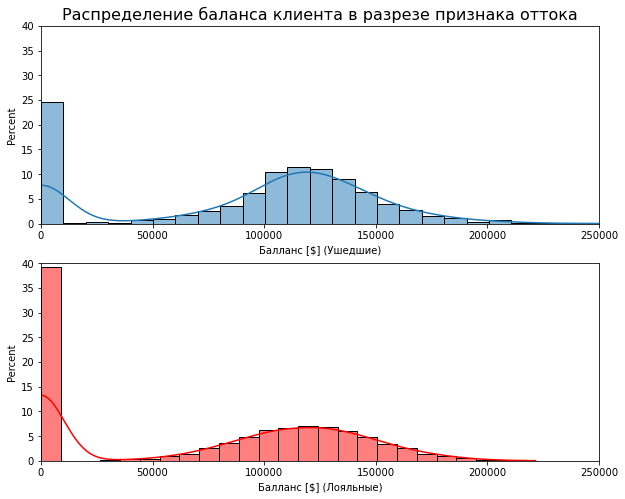

In [7]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].set_title('Распределение баланса клиента в разрезе признака оттока', fontsize=16)
axes[0].set_xlim(0,250000)
axes[1].set_xlim(0,250000)
axes[0].set_ylim(0,40)
axes[1].set_ylim(0,40)
axes[0].set_xlabel('Балланс [$] (Ушедшие)')
axes[1].set_xlabel('Балланс [$] (Лояльные)')
sns.histplot(
    data=churn_data[churn_data['Exited']==1],
    x='Balance',
    bins=25,
    ax=axes[0],
    stat='percent',
    kde=True
);
sns.histplot(
    data=churn_data[churn_data['Exited']==0],
    x='Balance',
    bins=25,
    color='red',
    ax=axes[1],
    stat='percent',
    kde=True
);


Из диаграммы видно, что характер распределения балланса для лояльных и ушедших клиентов в целом похож: для клиентов с ненулевым баллансом пики распределения приходится на близкие значения, и распределения одинаково симметричны. Но есть и отличия: во-первых количество клиентов с нулевым баллансом у лояльных гораздо выше чем у ушедших (~40% и ~25%), во-вторых, для лояльных клиентов гистограмма более пологая.

Из этого можно сделать выводы о том, что
* лояльность ~40% "лояльных" клиентов не подкреплена наличием средств на их баллансе, возможно, лучше вывести их в отдельную категорию
* в гуппу риска ухода попадают клиенты с баллансом 90-150 K$

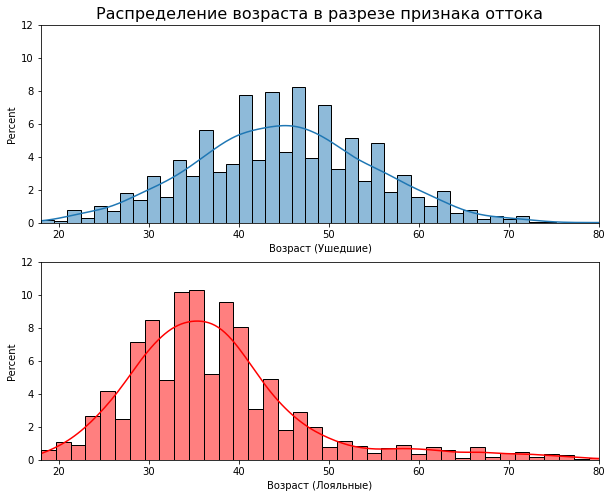

In [8]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов?
#  На какую возрастную категорию клиентов стоит обратить внимание банку?
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axes[0].set_title('Распределение возраста в разрезе признака оттока', fontsize=16)
axes[0].set_xlim(18,80)
axes[1].set_xlim(18,80)
axes[0].set_ylim(0,12)
axes[1].set_ylim(0,12)
axes[0].set_xlabel('Возраст (Ушедшие)')
axes[1].set_xlabel('Возраст (Лояльные)')
sns.histplot(
    data=churn_data[churn_data['Exited']==1],
    x='Age',
    bins=45,
    ax=axes[0],
    stat='percent',
    kde=True
);
sns.histplot(
    data=churn_data[churn_data['Exited']==0],
    x='Age',
    bins=45,
    color='red',
    ax=axes[1],
    stat='percent',
    kde=True
);


Из распределения возраста видно, что в группе ушедших клиентов наблюдаются более регулярные (с инрервалом 2.5-3 года) выбросы. Банку стоит обратить внимание на возрастную группу 40-50 лет, на которую приходится наибольшее число ушедших клиентов.

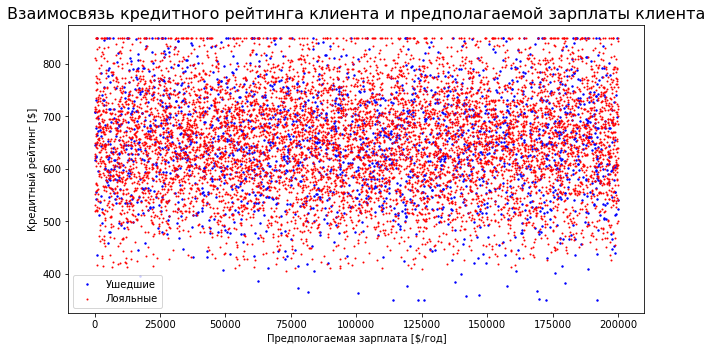

In [9]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.
#  Добавьте расцветку по признаку оттока клиентов.
#  Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.


fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Взаимосвязь кредитного рейтинга клиента и предполагаемой зарплаты клиента', fontsize=16)
axes.set_ylabel('Кредитный рейтинг [$]')
axes.set_xlabel('Предпологаемая зарплата [$/год]')
s1 = axes.scatter(
    y=churn_data[churn_data['Exited']==1]['CreditScore'], 
    x=churn_data[churn_data['Exited']==1]['EstimatedSalary'], 
    s=2,
    marker='o',
    c = 'blue'
);
s2 = axes.scatter(
    y=churn_data[churn_data['Exited']==0]['CreditScore'], 
    x=churn_data[churn_data['Exited']==0]['EstimatedSalary'], 
    s=1,
    marker='o',
    c = 'red'
);

axes.legend([s1, s2],['Ушедшие','Лояльные']);

Явной зависимости между кредитным рейтингом и предпологаемой зарплатой не наблюдается (что довольно странно). Но из графика видно, что кредитный рейтинг менее 400$ у лояльных клиентов не встречается, только у ушедших.

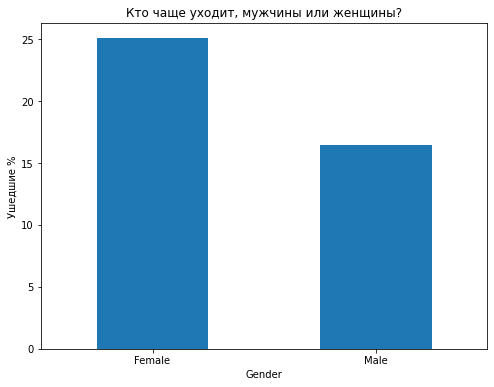

In [10]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# Подсказка
# Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited
# (так как 1 — это ушедшие клиенты, а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).

df96 = 100 * churn_data.groupby('Gender')['Exited'].sum()/churn_data.groupby('Gender')['CustomerId'].count()
df96.plot(
    kind='bar'
    ,title='Кто чаще уходит, мужчины или женщины?'
    ,figsize=(8, 6)
    ,rot=0
    ,ylabel = 'Ушедшие %'
    );


Согласно данным, женщины уходят чаще чем мужчины

In [17]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

import plotly
import plotly.express as px

fig = px.bar(
    data_frame=churn_data['NumOfProducts'].value_counts(), #датафрейм
  #  x="country", #ось x
  #  y="recover_rate", #ось y
  #  color='country', #расцветка в зависимости от страны
  #  text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='' #заголовок
)

#отображаем его
fig.show()
